# ***Training Data to Predict Heart Failure***

In [1]:
#Importing all relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_regression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import os

# used to make graph appear below cell in notebook.
%matplotlib inline 

## Importing Data

In [2]:
path = "data/heart_failure_clinical_records_dataset.csv" # Setting Data Path
heart_failure = pd.read_csv(path) # Reading Data using Pandas

## LOGISTIC REGRESSION
### Basic

In [3]:
features =  ['anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 
             'serum_sodium', 'sex', 'smoking', 'time'] # ALL FEATURES BESIDES DEATH_EVENT
       
X = heart_failure[features] #Features assigned to X
y = heart_failure["DEATH_EVENT"] # Event to be predicted

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2) # Splitting data 

model_logReg = LogisticRegression() # Logistic Regression model

model_logReg.fit(X_train, y_train) # Fitting model on Training Set
predict_logReg = model_logReg.predict(X_test) # Predicting target based on testing data
score_logReg = accuracy_score(y_test, predict_logReg) # Checking the accuracy by comparing prediction to actual values

print("Logistic Regression Success Rate :", "{:.2f}%".format(100*score_logReg))


Logistic Regression Success Rate : 85.00%


## LOGISTIC REGRESSION
### Preprocessing using Standard Scalar

In [4]:
scaler = StandardScaler().fit(X) # Fitting the standard scalar preprocessor to standardize the data
X_scaled = scaler.transform(X) # Assigning syandarized X data to X_scaled

XS_train, XS_test, yS_train, yS_test = train_test_split(X_scaled, y, random_state=1, test_size=0.2) # Splitting train-test data post preprocessing

model_logReg.fit(XS_train, yS_train) # Fitting model on Training Set
predict_S_logReg = model_logReg.predict(XS_test) # Predicting target based on testing data
score_S_logReg = accuracy_score(yS_test, predict_S_logReg) # Checking the accuracy by comparing prediction to actual values

print("Logistic Regression Success Rate :", "{:.2f}%".format(100*score_S_logReg))



Logistic Regression Success Rate : 86.67%


## Mutual Information

Text(0.5, 1.0, 'Mutual Information Scores')

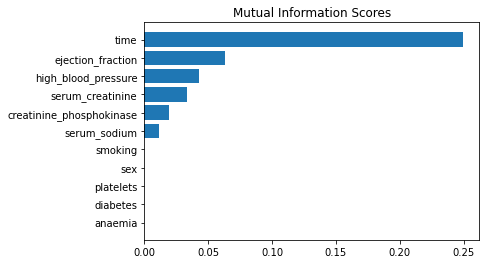

In [5]:
# Finding the mutual information scores
mi_scores = mutual_info_regression(X, y, random_state=1) # Caluclated using non standardized data
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns) # Converting to series
mi_scores = mi_scores.sort_values(ascending=False) # Sorting in descending order

# The part below is responsible for the graph
mi_scores = mi_scores.sort_values(ascending=True)
width = np.arange(len(mi_scores))
ticks = list(mi_scores.index)
plt.barh(width, mi_scores)
plt.yticks(width, ticks)
plt.title("Mutual Information Scores")

## LOGISTIC REGRESSION
### Preprocessing using Standard Scalar & Using only top 4 Mutual Features


In [6]:
features_MI =  ['ejection_fraction', 'high_blood_pressure', 'serum_creatinine', 'time'] # Taking top 4 features found using Mutual Information
       
X_MI = heart_failure[features_MI] # Assigning X_MI to top 4 features
y_MI = heart_failure["DEATH_EVENT"] # Assigning y_MI to target feature

scalerMI = StandardScaler().fit(X_MI) # Fitting the standard scalar preprocessor to standardize the data
XMI_scaled = scalerMI.transform(X_MI) # Assigning syandarized X data to X_scaled

# Splitting train-test data post preprocessing & MI
XSMI_train, XSMI_test, ySMI_train, ySMI_test = train_test_split(XMI_scaled, y_MI, random_state = 1, test_size=0.2) 

model_logReg.fit(XSMI_train, ySMI_train) # Fitting model on Training Set
predict_logReg = model_logReg.predict(XSMI_test) # Predicting target based on testing data
score_logReg = accuracy_score(ySMI_test, predict_logReg) # Checking the accuracy by comparing prediction to actual values

print("Logistic Regression Success Rate :", "{:.2f}%".format(100*score_logReg))

Logistic Regression Success Rate : 88.33%


## LOGISTIC REGRESSION
### Preprocessing using Standard Scalar & Cross Validation


In [7]:
my_pipeline = Pipeline(steps=[('scaler', StandardScaler()),
                              ('model', LogisticRegression())]) # Defining Pipeline for Standard Scalar & Logistic Regression

scores = cross_val_score(my_pipeline, X_scaled, y, cv = 5) # Cross-Validation using all features

print("Cross Validation Success Rate :", "{:.2f}%".format(100*scores.mean()))

                

Cross Validation Success Rate : 76.23%


## LOGISTIC REGRESSION
### Preprocessing using Standard Scalar & Using only top 4 Mutual Features & Cross Validation


In [8]:
my_pipeline = Pipeline(steps=[('scaler', StandardScaler()),
                              ('model', LogisticRegression())]) # Defining Pipeline for Standard Scalar & Logistic Regression

scores = cross_val_score(my_pipeline, XMI_scaled, y, cv = 5) # Cross-Validation using top 4 MI features

print("Cross Validation Success Rate :", "{:.2f}%".format(100*scores.mean()))

Cross Validation Success Rate : 78.56%


## K-Nearest Neighbours (KNN)
### Basic

In [9]:
model_knn = KNeighborsClassifier() # KNN model

model_knn.fit(X_train, y_train) # Fitting model on Training Set
predict_knn = model_knn.predict(X_test) # Predicting target based on testing data
score_knn = accuracy_score(y_test, predict_knn) # Checking the accuracy by comparing prediction to actual values

print("K-Nearest Neigbour Success Rate :", "{:.2f}%".format(100*score_knn))

K-Nearest Neigbour Success Rate : 63.33%


## K-Nearest Neighbours (KNN)
### Preprocessing using Standard Scalar


In [10]:
model_knn = KNeighborsClassifier() # KNN model

model_knn.fit(XS_train, yS_train) # Fitting model on Training Set that has been standardized
predict_knn = model_knn.predict(XS_test) # Predicting target based on testing data
score_knn = accuracy_score(yS_test, predict_knn) # Checking the accuracy by comparing prediction to actual values

print("K-Nearest Neigbour Success Rate :", "{:.2f}%".format(100*score_knn))

K-Nearest Neigbour Success Rate : 80.00%


## K-Nearest Neighbours (KNN)
### Preprocessing using Standard Scalar & Using only top 4 Mutual Features


In [11]:
model_knn = KNeighborsClassifier() # KNN model

model_knn.fit(XSMI_train, ySMI_train) # Fitting model on Training Set that has been standardized and has only top 4 MI attributes
predict_knn = model_knn.predict(XSMI_test) # Predicting target based on testing data
score_knn = accuracy_score(ySMI_test, predict_knn) # Checking the accuracy by comparing prediction to actual values

print("K-Nearest Neigbour Success Rate :", "{:.2f}%".format(100*score_knn))

K-Nearest Neigbour Success Rate : 88.33%


## K-Nearest Neighbours (KNN)
### Preprocessing using Standard Scalar & Cross Validation


In [12]:
my_pipeline = Pipeline(steps=[('scaler', StandardScaler()),
                              ('model', KNeighborsClassifier())])# Defining Pipeline for Standard Scalar & KNN

scores = cross_val_score(my_pipeline, X, y, cv = 5) # Cross-Validation

print("Cross Validation Success Rate :", "{:.2f}%".format(100*scores.mean()))

Cross Validation Success Rate : 72.90%


## K-Nearest Neighbours (KNN)
### Preprocessing using Standard Scalar & Cross Validation & Using only top 4 Mutual Features


In [13]:
my_pipeline = Pipeline(steps=[('scaler', StandardScaler()),
                              ('model', KNeighborsClassifier())]) # Defining Pipeline for Standard Scalar & KNN

scores = cross_val_score(my_pipeline, XMI_scaled, y, cv = 5) # Cross-Validation using top 4 MI features

print("Cross Validation Success Rate :", "{:.2f}%".format(100*scores.mean()))

Cross Validation Success Rate : 69.56%


## DEEP LEARNING
### Using Standard Scalar Data


Epoch 1/20
5/5 [==============================] - 3s 158ms/step - loss: 0.3859 - accuracy: 0.7071 - val_loss: 0.3380 - val_accuracy: 0.8167
Epoch 2/20
5/5 [==============================] - 0s 41ms/step - loss: 0.3508 - accuracy: 0.7573 - val_loss: 0.2909 - val_accuracy: 0.8500
Epoch 3/20
5/5 [==============================] - 0s 36ms/step - loss: 0.2820 - accuracy: 0.7782 - val_loss: 0.2568 - val_accuracy: 0.8500
Epoch 4/20
5/5 [==============================] - 0s 39ms/step - loss: 0.2941 - accuracy: 0.7824 - val_loss: 0.2505 - val_accuracy: 0.8667
Epoch 5/20
5/5 [==============================] - 0s 40ms/step - loss: 0.2588 - accuracy: 0.8326 - val_loss: 0.2330 - val_accuracy: 0.8833
Epoch 6/20
5/5 [==============================] - 0s 43ms/step - loss: 0.2549 - accuracy: 0.8452 - val_loss: 0.2346 - val_accuracy: 0.8500
Epoch 7/20
5/5 [==============================] - 0s 50ms/step - loss: 0.2527 - accuracy: 0.8201 - val_loss: 0.2143 - val_accuracy: 0.8667
Epoch 8/20
5/5 [==========

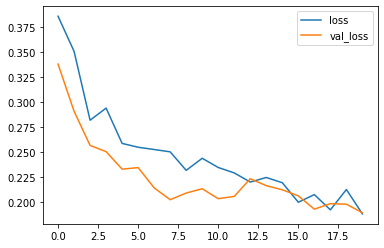

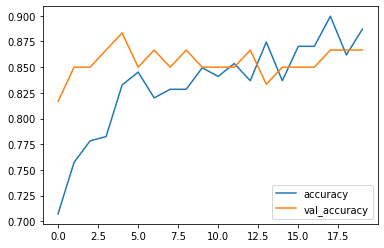

In [14]:
#Defining Model
model_tf = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]), # NN layer
    layers.Dropout(rate=0.3), #Dropout Layer
    layers.Dense(512, activation='relu'), # NN layer
    layers.Dropout(rate=0.3), #Dropout Layer
    layers.Dense(512, activation='relu'), # NN layer
    layers.Dense(1),
])
# Compiling the model for the following optimizer, loss function, and metrics.
model_tf.compile(
    optimizer='adam',
    loss='mae',
    metrics=["accuracy"]
)

#Fitting the model
history = model_tf.fit(
    XS_train, yS_train, #Using Standard Scalar Data
    validation_data=(XS_test, yS_test), #Using Standard Scalar Data
    batch_size=50,
    epochs=20,
)

#Creating graphs to visualize the loss and accuracy values to check for under-fitting and over-fitting 
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
history_df.loc[:, ['accuracy', 'val_accuracy']].plot();

Epoch 1/100
4/4 [==============================] - 1s 81ms/step - loss: 0.4017 - accuracy: 0.6695 - val_loss: 0.2855 - val_accuracy: 0.7667
Epoch 2/100
4/4 [==============================] - 0s 22ms/step - loss: 0.3519 - accuracy: 0.6653 - val_loss: 0.2522 - val_accuracy: 0.7667
Epoch 3/100
4/4 [==============================] - 0s 27ms/step - loss: 0.3465 - accuracy: 0.6611 - val_loss: 0.2539 - val_accuracy: 0.7667
Epoch 4/100
4/4 [==============================] - 0s 29ms/step - loss: 0.3408 - accuracy: 0.6611 - val_loss: 0.2438 - val_accuracy: 0.7667
Epoch 5/100
4/4 [==============================] - 0s 25ms/step - loss: 0.3231 - accuracy: 0.6820 - val_loss: 0.2430 - val_accuracy: 0.7667
Epoch 6/100
4/4 [==============================] - 0s 27ms/step - loss: 0.3127 - accuracy: 0.6862 - val_loss: 0.2444 - val_accuracy: 0.7667
Epoch 7/100
4/4 [==============================] - 0s 27ms/step - loss: 0.2959 - accuracy: 0.7029 - val_loss: 0.2344 - val_accuracy: 0.7667
Epoch 8/100
4/4 [===

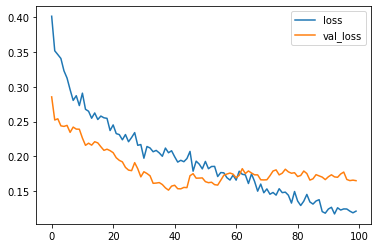

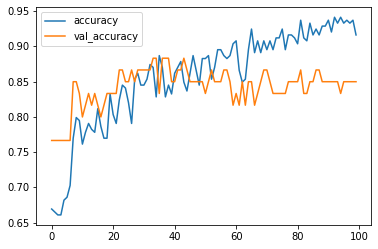

In [38]:
#Defining Model
model_tf = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]), # NN layer
    layers.Dropout(rate=0.3), #Dropout Layer
    layers.Dense(512, activation='relu'), # NN layer
    layers.Dropout(rate=0.5), #Dropout Layer
    layers.Dense(512, activation='relu'), # NN layer
    layers.Dropout(rate=0.3), #Dropout Layer
    layers.Dense(128, activation='relu'), # NN layer
    layers.Dense(128, activation='relu'), # NN layer

    layers.Dense(1),
])
# Compiling the model for the following optimizer, loss function, and metrics.
optimizer = keras.optimizers.Adam(learning_rate=0.0005)
model_tf.compile(
    optimizer=optimizer,
    loss='mae',
    metrics=["accuracy"]
)

#Fitting the model
history = model_tf.fit(
    XS_train, yS_train, #Using Standard Scalar Data
    validation_data=(XS_test, yS_test), #Using Standard Scalar Data
    batch_size=75,
    epochs=100,
)

#Creating graphs to visualize the loss and accuracy values to check for under-fitting and over-fitting 
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
history_df.loc[:, ['accuracy', 'val_accuracy']].plot();